# FISHFactor demo

In [1]:
import torch
import matplotlib.pyplot as plt
from src.simulation import simulate_data
from src.fishfactor import FISHFactor

In [2]:
# data simulation
n_cells = 5
n_genes = 20
n_factors = 3

intensity_scales = torch.distributions.LogNormal(5, 0.1).sample([n_cells, n_genes])

data = simulate_data(
    n_cells=n_cells,
    n_genes=n_genes,
    n_factors=n_factors,
    factor_images_dir='data/simulated/factors',
    intensity_scales=intensity_scales,
    weight_sparsity=0.7
    )

In [5]:
data['coordinates'].head(10)

,x,y,gene,cell
0,0.022200,0.513189,1Vfa,0
1,0.475730,0.102222,1Vfa,0
2,0.509068,0.063236,1Vfa,0
3,0.745876,0.193025,1Vfa,0
4,0.269029,0.401135,1Vfa,0
5,0.722658,0.584312,1Vfa,0
6,0.467755,0.655271,1Vfa,0
7,0.650895,0.598030,1Vfa,0
8,0.268920,0.194924,1Vfa,0
9,0.417716,0.425613,1Vfa,0


In [8]:
#device = 'cpu'
device = 'cuda:0'

model = FISHFactor(
    data=data['coordinates'],
    n_factors=n_factors,
    device=device,
)

In [10]:
model.inference(save=False)

epoch: 0, cell: 0, improvement: 0.0105, patience: 100
epoch: 0, cell: 1, improvement: 0.0017, patience: 100
epoch: 0, cell: 2, improvement: 0.009, patience: 100
epoch: 0, cell: 3, improvement: 0.0008, patience: 100
epoch: 0, cell: 4, improvement: 0.0048, patience: 100
epoch: 1, cell: 0, improvement: 0.0151, patience: 99
epoch: 1, cell: 1, improvement: -0.0002, patience: 99
epoch: 1, cell: 2, improvement: 0.0048, patience: 99
epoch: 1, cell: 3, improvement: 0.002, patience: 99
epoch: 1, cell: 4, improvement: 0.0147, patience: 99
epoch: 2, cell: 0, improvement: 0.0211, patience: 98
epoch: 2, cell: 1, improvement: -0.0099, patience: 98
epoch: 2, cell: 2, improvement: 0.0146, patience: 98
epoch: 2, cell: 3, improvement: 0.0016, patience: 98
epoch: 2, cell: 4, improvement: 0.0125, patience: 98
epoch: 3, cell: 0, improvement: 0.0193, patience: 97
epoch: 3, cell: 1, improvement: 0.0034, patience: 97
epoch: 3, cell: 2, improvement: 0.0149, patience: 97
epoch: 3, cell: 3, improvement: 0.0089, p

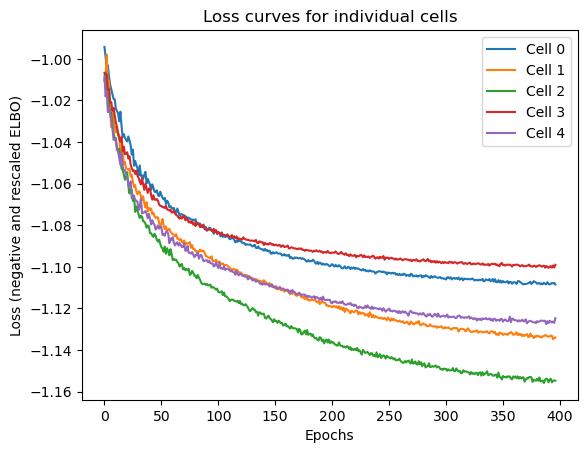

In [28]:
for cell in range(len(model.losses)):
    plt.plot(torch.arange(len(model.losses[cell])), model.losses[cell], label=f'Cell {cell}')
plt.legend()
plt.title('Loss curves for individual cells')
plt.xlabel('Epochs')
plt.ylabel('Loss (negative and rescaled ELBO)')
plt.show()

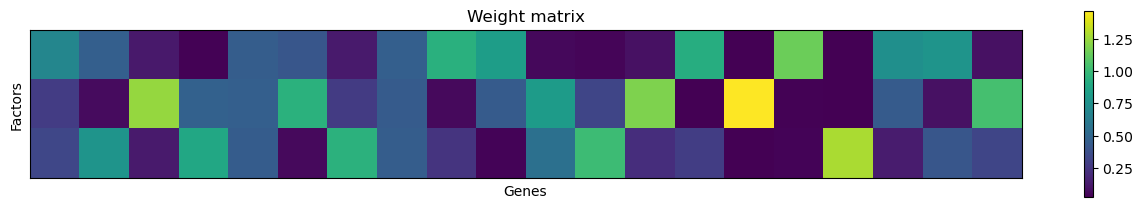

In [18]:
w = model.get_weights()

plt.matshow(w.T, cmap='viridis')
plt.xlabel('Genes')
plt.ylabel('Factors')
plt.title('Weight matrix')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

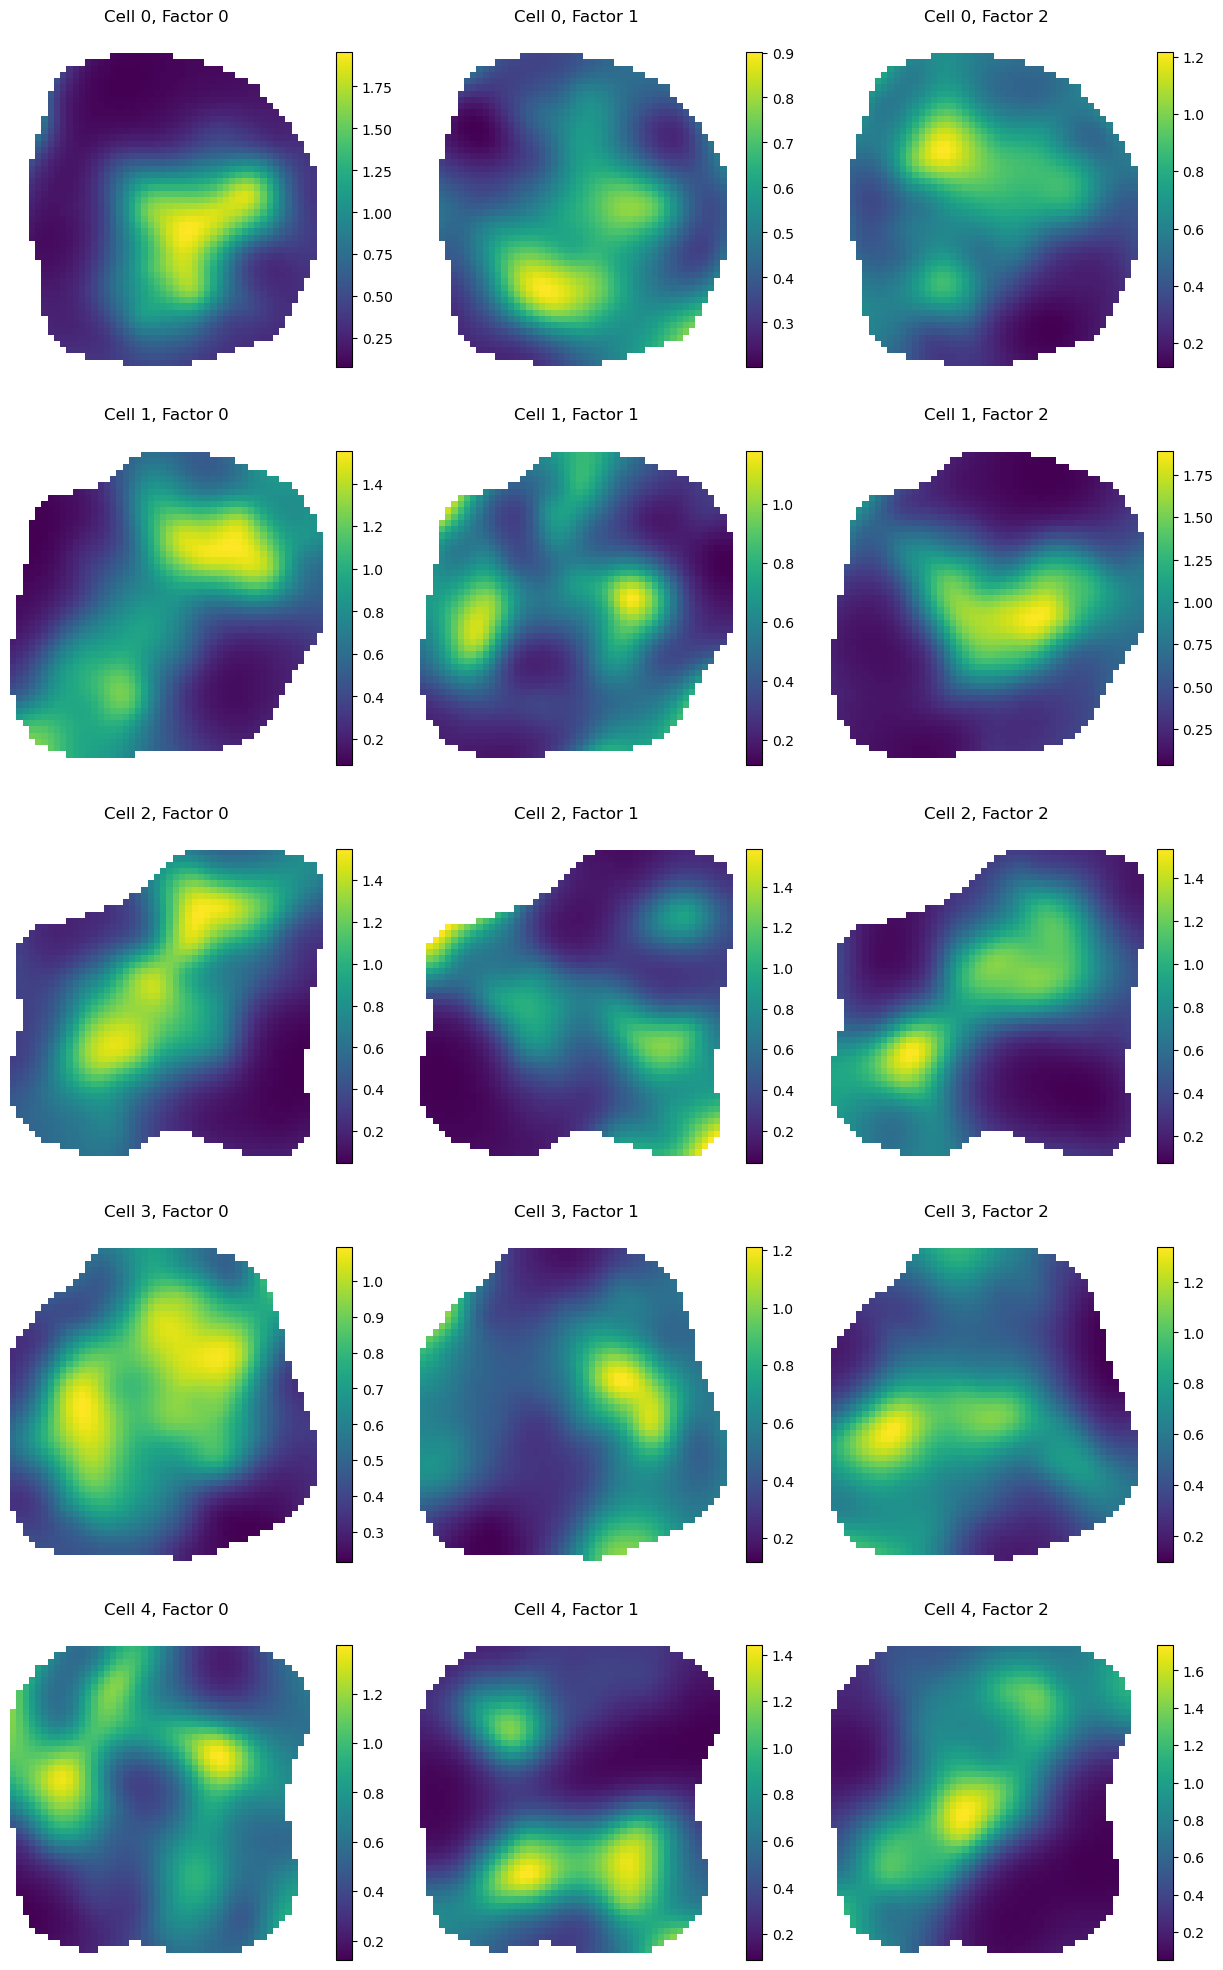

In [31]:
z = model.get_factors() # shape (n_cells, n_factors, n_y, n_x)

fig, axs = plt.subplots(z.shape[0], 3, figsize=(15, 5 * z.shape[0]))

for cell in range(z.shape[0]):
    for k in range(z.shape[1]):
        im = axs[cell, k].matshow(z[cell, k])
        axs[cell, k].set_title(f'Cell {cell}, Factor {k}')
        axs[cell, k].axis('off')
        plt.colorbar(im, fraction=0.046, pad=0.04)